# xem nhanh qua data

In [1]:
import pandas as pd

df = pd.read_csv("global_disaster_response_2018_2024.csv")
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,31/1/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,23/12/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,10/8/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,15/9/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,28/9/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,5.02,100.59,5068593.45,12.18,250000.33,87.57,49.68,0.23,0.09
std,1.94,65.05,3268540.52,9.26,143227.51,10.19,20.10,34.76,98.38
min,1.00,0.00,527.39,1.00,16.60,29.75,2.00,-59.99,-170.00
25%,3.66,51.00,2585513.48,6.27,142966.34,83.06,36.00,-29.85,-85.55
50%,4.99,91.00,4548350.74,10.51,230536.47,89.18,49.00,0.27,0.39
75%,6.34,138.00,6950614.61,15.45,335225.93,94.70,63.00,30.49,85.67
max,10.00,524.00,24456237.87,63.10,1126465.23,100.00,112.00,60.00,170.00


 - 0   country                    Quốc gia
 - 1   disaster_type              Loại thảm họa 
 - 2   severity_index             mức độ thảm họa
 - 3   casualties                 người bị ảnh hưởng 
 - 4   response_time_hours        thời gian phản ứng
 - 5   aid_amount_usd             tổng viện trợ quốc tế
 - 6   response_efficiency_score  điểm hiệu quả phản ứng
 - 7   recovery_days              ngày hồi phục 
 - 8   latitude                   vĩ độ
 - 9   longitude                  kinh độ
 - 10  economic_loss_usd          thiệt hại kinh tế

In [16]:
# kiểm tra lặp 
df.duplicated().sum()

np.int64(0)

In [17]:
# kiểm tra thiếu
df.isnull().sum()

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
dtype: int64

- dữ liệu nhiều rất sạch không lặp, không missing.

# 1.severity_index mức độ thảm họa

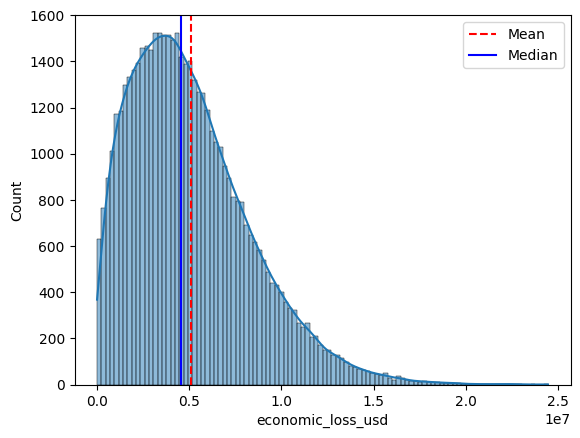

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

g = "economic_loss_usd"
sns.histplot(df[g], kde=True)
plt.axvline(df[g].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df[g].median(), color='blue', linestyle='-', label='Median')
plt.legend()
plt.show()


In [15]:
# xem các dòng có mức độ thảm họa = 1
df_sev = df[df['severity_index'].isin([1])].copy()
print("Số dòng:", df_sev.shape[0])
df_sev.head()

Số dòng: 1160


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
250,25/6/2024,Germany,Flood,1.00,26,672962.16,38.85,60224.05,68.02,9,0.89,-117.39
312,26/4/2018,Germany,Hurricane,1.00,35,288021.42,46.67,41415.11,56.28,2,-21.76,-136.31
392,28/4/2023,United States,Storm Surge,1.00,17,1120660.97,42.24,57726.47,56.73,18,-28.14,52.90
412,27/3/2020,Bangladesh,Volcanic Eruption,1.00,15,736876.07,54.94,42299.56,46.97,10,30.71,-72.34
413,2/1/2019,Australia,Earthquake,1.00,27,1107698.25,50.54,128524.75,39.04,18,18.28,-91.05


In [13]:
# xem các dòng có mức độ thảm họa = 10
df_sev = df[df['severity_index'].isin([10])].copy()
print("Số dòng:", df_sev.shape[0])
df_sev.head()

Số dòng: 301


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
213,3/4/2023,France,Flood,10.00,143,10922756.52,12.51,901218.58,97.80,106,55.55,-122.14
358,16/1/2020,Greece,Storm Surge,10.00,324,3244628.17,1.00,596373.21,100.00,102,32.13,-126.13
463,28/2/2022,India,Volcanic Eruption,10.00,33,15293642.65,3.94,654384.03,98.27,96,-48.90,76.36
693,2/2/2019,Bangladesh,Hurricane,10.00,253,10744384.02,10.71,968730.81,93.65,104,-56.91,-111.92
753,19/7/2021,Philippines,Wildfire,10.00,80,13494598.43,2.75,656671.74,89.90,93,43.49,-108.68


In [25]:
def get_min_max_rows(df, col):
    min_row = df.loc[df[col].idxmin()]
    max_row = df.loc[df[col].idxmax()]
    return pd.DataFrame([min_row, max_row])


# 2.economic_loss_usd thiệt hại do thảm họa

In [26]:
economic_loss_extreme = get_min_max_rows(df_sev, 'economic_loss_usd')